In [1]:
#Importando as bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2.1 #

In [2]:
#Importando base itpd
itpd = pd.read_stata(r'C:\Users\david\OneDrive - Insper - Institudo de Ensino e Pesquisa\Insper\6º semestre\Comércio Internacional\APS3\com_int_dados_aps3/itpd.dta')

In [3]:
#Entendendo a base itpd

itpd.head()

,exporter_iso3,exporter_m49,importer_iso3,importer_m49,year,industry_id,broad_sector,trade,flag_mirror,flag_zero
0,ABW,Aruba,AGO,Angola,2000,Refined petroleum products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
1,ABW,Aruba,AGO,Angola,2000,Structural metal products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
2,ABW,Aruba,AGO,Angola,2000,Pumps compressors taps and valves,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
3,ABW,Aruba,AGO,Angola,2000,Other general purpose machinery,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
4,ABW,Aruba,AGO,Angola,2000,TV and radio receivers and associated goods,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"


In [76]:
#Importando base WDICountry

wdi = pd.read_excel(r'C:\Users\david\OneDrive - Insper - Institudo de Ensino e Pesquisa\Insper\6º semestre\Comércio Internacional\APS3\com_int_dados_aps3/WDICountry.xlsx')

In [77]:
#Entendendo a base wdi

wdi.head()

,Economy,Code,Region,Income group,Lending category,Other (EMU or HIPC)
0,Aruba,ABW,Latin America & Caribbean,High income,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,NaN
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN,NaN


***Item a)***

In [6]:
#Convertendo para U$bilhões

itpd['trade'] = itpd['trade'] / 10**9

In [7]:
#Retirando comércio doméstico

itpd = itpd[itpd['exporter_m49'] != itpd['importer_m49']]
itpd.head()

,exporter_iso3,exporter_m49,importer_iso3,importer_m49,year,industry_id,broad_sector,trade,flag_mirror,flag_zero
0,ABW,Aruba,AGO,Angola,2000,Refined petroleum products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
1,ABW,Aruba,AGO,Angola,2000,Structural metal products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
2,ABW,Aruba,AGO,Angola,2000,Pumps compressors taps and valves,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
3,ABW,Aruba,AGO,Angola,2000,Other general purpose machinery,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
4,ABW,Aruba,AGO,Angola,2000,TV and radio receivers and associated goods,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"


In [8]:
# Criando Dataframe para exportações
itpd_e = itpd[['exporter_m49','broad_sector','industry_id','year','trade']] #Selecionando variáveis de interesse
itpd_e.rename(columns = {'exporter_m49':'Country','broad_sector':'Industry', 'industry_id': 'Sector','trade':'Export'}, inplace = True) #Renomeando colunas
itpd_e

C:\Users\david\AppData\Local\Temp\ipykernel_25456\3774733068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itpd_e.rename(columns = {'exporter_m49':'Country','broad_sector':'Industry', 'industry_id': 'Sector','trade':'Export'}, inplace = True) #Renomeando colunas


,Country,Industry,Sector,year,Export
0,Aruba,Manufacturing,Refined petroleum products,2000,0.000000e+00
1,Aruba,Manufacturing,Structural metal products,2000,0.000000e+00
2,Aruba,Manufacturing,Pumps compressors taps and valves,2000,0.000000e+00
3,Aruba,Manufacturing,Other general purpose machinery,2000,0.000000e+00
4,Aruba,Manufacturing,TV and radio receivers and associated goods,2000,0.000000e+00
...,...,...,...,...,...
38518190,Zimbabwe,Manufacturing,Jewellery and related articles,2016,1.028200e-11
38518191,Zimbabwe,Manufacturing,Musical instruments,2016,0.000000e+00
38518192,Zimbabwe,Manufacturing,Sports goods,2016,1.150000e-13
38518193,Zimbabwe,Manufacturing,Games and toys,2016,2.748000e-12


In [9]:
# Criando Dataframe para exportações por setor

export_per_sector = itpd_e.groupby(['Country','Industry','Sector','year']).agg(Export=('Export', 'sum'))
export_per_sector.head()

Export
Country     Industry    Sector year        
Afghanistan Agriculture Wheat  2000     0.0
                               2001     0.0
                               2002     0.0
                               2003     0.0
                               2004     0.0

In [10]:
# Para 2016

exports_i2016 = export_per_sector.xs(2016, level='year')
exports_i2016

Export
Country     Industry    Sector                                            
Afghanistan Agriculture Wheat                                 0.000000e+00
                        Rice (raw)                            2.330600e-11
                        Corn                                  2.000000e-12
                        Other cereals                         0.000000e+00
                        Cereal products                       9.800000e-11
...                                                                    ...
Zambia      Services    Education services                    0.000000e+00
                        Government goods and services n.i.e.  0.000000e+00
                        Services not allocated                0.000000e+00
                        Trade-related services                0.000000e+00
                        Other personal services               0.000000e+00

[163880 rows x 1 columns]

In [11]:
# Analogamente para importações:

itpd_i = itpd[['importer_m49','broad_sector', 'industry_id','year','trade']] #Selecionando variáveis de interesse
itpd_i.rename(columns = {'importer_m49':'Country', 'broad_sector':'Industry', 'industry_id':'Sector','trade':'Import'}, inplace = True) #Renomeando colunas

import_per_sector = itpd_i.groupby(['Country','Industry', 'Sector','year']).agg(Import=('Import', 'sum'))
import_per_sector

C:\Users\david\AppData\Local\Temp\ipykernel_25456\749444200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itpd_i.rename(columns = {'importer_m49':'Country', 'broad_sector':'Industry', 'industry_id':'Sector','trade':'Import'}, inplace = True) #Renomeando colunas


Import
Country     Industry    Sector                  year              
Afghanistan Agriculture Wheat                   2000  5.761000e-08
                                                2001  2.062500e-08
                                                2002  1.819900e-08
                                                2003  4.726000e-09
                                                2004  7.523000e-09
...                                                            ...
Zambia      Services    Other personal services 2012  0.000000e+00
                                                2013  0.000000e+00
                                                2014  0.000000e+00
                                                2015  0.000000e+00
                                                2016  0.000000e+00

[2785960 rows x 1 columns]

In [12]:
imports_i2016 = import_per_sector.xs(2016, level='year')
imports_i2016

Import
Country     Industry    Sector                                            
Afghanistan Agriculture Wheat                                 4.473800e-08
                        Rice (raw)                            2.842400e-11
                        Corn                                  1.847000e-09
                        Other cereals                         2.249000e-09
                        Cereal products                       1.730000e-10
...                                                                    ...
Zambia      Services    Education services                    0.000000e+00
                        Government goods and services n.i.e.  0.000000e+00
                        Services not allocated                0.000000e+00
                        Trade-related services                0.000000e+00
                        Other personal services               0.000000e+00

[163880 rows x 1 columns]

In [87]:
# Agregando os Dataframes

im_ex2016 = pd.merge(exports_i2016, imports_i2016, left_index=True, right_index=True)

#Resetando o índice
im_ex2016 = im_ex2016.reset_index()
im_ex2016

,Country,Industry,Sector,Export,Import
0,Afghanistan,Agriculture,Wheat,0.000000e+00,4.473800e-08
1,Afghanistan,Agriculture,Rice (raw),2.330600e-11,2.842400e-11
2,Afghanistan,Agriculture,Corn,2.000000e-12,1.847000e-09
3,Afghanistan,Agriculture,Other cereals,0.000000e+00,2.249000e-09
4,Afghanistan,Agriculture,Cereal products,9.800000e-11,1.730000e-10
...,...,...,...,...,...
163875,Zambia,Services,Education services,0.000000e+00,0.000000e+00
163876,Zambia,Services,Government goods and services n.i.e.,0.000000e+00,0.000000e+00
163877,Zambia,Services,Services not allocated,0.000000e+00,0.000000e+00
163878,Zambia,Services,Trade-related services,0.000000e+00,0.000000e+00


***Item b)***

In [78]:
# Selecionando as colunas de interesse

wdi = wdi[['Economy','Code','Income group']]

#Retirando as linhas desnecessárias

wdi = wdi.drop(wdi.index[218:])

In [79]:
wdi

,Economy,Code,Income group
0,Aruba,ABW,High income
1,Afghanistan,AFG,Low income
2,Angola,AGO,Lower middle income
3,Albania,ALB,Upper middle income
4,Andorra,AND,High income
...,...,...,...
213,Kosovo,XKX,Upper middle income
214,"Yemen, Rep.",YEM,Low income
215,South Africa,ZAF,Upper middle income
216,Zambia,ZMB,Low income


In [80]:
#Renomeando

wdi.rename(columns = {'Economy':'Country'}, inplace = True)

In [97]:
im_ex2016m = pd.merge(im_ex2016, wdi, on='Country', how='left')
im_ex2016m

,Country,Industry,Sector,Export,Import,Code,Income group
0,Afghanistan,Agriculture,Wheat,0.000000e+00,4.473800e-08,AFG,Low income
1,Afghanistan,Agriculture,Rice (raw),2.330600e-11,2.842400e-11,AFG,Low income
2,Afghanistan,Agriculture,Corn,2.000000e-12,1.847000e-09,AFG,Low income
3,Afghanistan,Agriculture,Other cereals,0.000000e+00,2.249000e-09,AFG,Low income
4,Afghanistan,Agriculture,Cereal products,9.800000e-11,1.730000e-10,AFG,Low income
...,...,...,...,...,...,...,...
163875,Zambia,Services,Education services,0.000000e+00,0.000000e+00,ZMB,Low income
163876,Zambia,Services,Government goods and services n.i.e.,0.000000e+00,0.000000e+00,ZMB,Low income
163877,Zambia,Services,Services not allocated,0.000000e+00,0.000000e+00,ZMB,Low income
163878,Zambia,Services,Trade-related services,0.000000e+00,0.000000e+00,ZMB,Low income


In [100]:
# Renomeando as colunas
im_ex2016m.rename(columns={'Industry': 'Sector', 'Sector': 'Industry'}, inplace=True)
im_ex2016m

,Country,Sector,Industry,Export,Import,Code,Income group
0,Afghanistan,Agriculture,Wheat,0.000000e+00,4.473800e-08,AFG,Low income
1,Afghanistan,Agriculture,Rice (raw),2.330600e-11,2.842400e-11,AFG,Low income
2,Afghanistan,Agriculture,Corn,2.000000e-12,1.847000e-09,AFG,Low income
3,Afghanistan,Agriculture,Other cereals,0.000000e+00,2.249000e-09,AFG,Low income
4,Afghanistan,Agriculture,Cereal products,9.800000e-11,1.730000e-10,AFG,Low income
...,...,...,...,...,...,...,...
163875,Zambia,Services,Education services,0.000000e+00,0.000000e+00,ZMB,Low income
163876,Zambia,Services,Government goods and services n.i.e.,0.000000e+00,0.000000e+00,ZMB,Low income
163877,Zambia,Services,Services not allocated,0.000000e+00,0.000000e+00,ZMB,Low income
163878,Zambia,Services,Trade-related services,0.000000e+00,0.000000e+00,ZMB,Low income


***Item c)***

In [101]:
im_ex2016m['G&L'] = 1 - abs(im_ex2016m['Export'] - im_ex2016m['Import'])/(im_ex2016m['Export'] + im_ex2016m['Import'])
im_ex2016m

,Country,Sector,Industry,Export,Import,Code,Income group,G&L
0,Afghanistan,Agriculture,Wheat,0.000000e+00,4.473800e-08,AFG,Low income,0.000000
1,Afghanistan,Agriculture,Rice (raw),2.330600e-11,2.842400e-11,AFG,Low income,0.901063
2,Afghanistan,Agriculture,Corn,2.000000e-12,1.847000e-09,AFG,Low income,0.002163
3,Afghanistan,Agriculture,Other cereals,0.000000e+00,2.249000e-09,AFG,Low income,0.000000
4,Afghanistan,Agriculture,Cereal products,9.800000e-11,1.730000e-10,AFG,Low income,0.723247
...,...,...,...,...,...,...,...,...
163875,Zambia,Services,Education services,0.000000e+00,0.000000e+00,ZMB,Low income,NaN
163876,Zambia,Services,Government goods and services n.i.e.,0.000000e+00,0.000000e+00,ZMB,Low income,NaN
163877,Zambia,Services,Services not allocated,0.000000e+00,0.000000e+00,ZMB,Low income,NaN
163878,Zambia,Services,Trade-related services,0.000000e+00,0.000000e+00,ZMB,Low income,NaN


***Item d)***

In [20]:
# Categorize as indústrias em dois grandes setores: serviços e não-serviços

In [102]:
#Separando setores por serviços e não serviços

s_ns = {'Agriculture': 'Não-Serviços', 'Mining & Energy': 'Não-Serviços', 'Manufacturing': 'Não-Serviços', 'Services': 'Serviços'}

im_ex2016m['Type'] = im_ex2016m['Sector'].map(s_ns)
im_ex2016m

,Country,Sector,Industry,Export,Import,Code,Income group,G&L,Type
0,Afghanistan,Agriculture,Wheat,0.000000e+00,4.473800e-08,AFG,Low income,0.000000,Não-Serviços
1,Afghanistan,Agriculture,Rice (raw),2.330600e-11,2.842400e-11,AFG,Low income,0.901063,Não-Serviços
2,Afghanistan,Agriculture,Corn,2.000000e-12,1.847000e-09,AFG,Low income,0.002163,Não-Serviços
3,Afghanistan,Agriculture,Other cereals,0.000000e+00,2.249000e-09,AFG,Low income,0.000000,Não-Serviços
4,Afghanistan,Agriculture,Cereal products,9.800000e-11,1.730000e-10,AFG,Low income,0.723247,Não-Serviços
...,...,...,...,...,...,...,...,...,...
163875,Zambia,Services,Education services,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços
163876,Zambia,Services,Government goods and services n.i.e.,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços
163877,Zambia,Services,Services not allocated,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços
163878,Zambia,Services,Trade-related services,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços


***Item e)***

In [103]:
#Vendo categorias de renda

print(im_ex2016m['Income group'].unique())

['Low income' 'Upper middle income' nan 'Lower middle income'
 'High income']


In [104]:
# Separando países por renda alta e não alta

r_nr = {'High income': 'Renda alta', 'Low income': 'Renda não-alta', 'Lower middle income': 'Renda não-alta', 'Upper middle income': 'Renda não-alta'}

im_ex2016m['Level'] = im_ex2016m['Income group'].map(r_nr)
im_ex2016m

,Country,Sector,Industry,Export,Import,Code,Income group,G&L,Type,Level
0,Afghanistan,Agriculture,Wheat,0.000000e+00,4.473800e-08,AFG,Low income,0.000000,Não-Serviços,Renda não-alta
1,Afghanistan,Agriculture,Rice (raw),2.330600e-11,2.842400e-11,AFG,Low income,0.901063,Não-Serviços,Renda não-alta
2,Afghanistan,Agriculture,Corn,2.000000e-12,1.847000e-09,AFG,Low income,0.002163,Não-Serviços,Renda não-alta
3,Afghanistan,Agriculture,Other cereals,0.000000e+00,2.249000e-09,AFG,Low income,0.000000,Não-Serviços,Renda não-alta
4,Afghanistan,Agriculture,Cereal products,9.800000e-11,1.730000e-10,AFG,Low income,0.723247,Não-Serviços,Renda não-alta
...,...,...,...,...,...,...,...,...,...,...
163875,Zambia,Services,Education services,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços,Renda não-alta
163876,Zambia,Services,Government goods and services n.i.e.,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços,Renda não-alta
163877,Zambia,Services,Services not allocated,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços,Renda não-alta
163878,Zambia,Services,Trade-related services,0.000000e+00,0.000000e+00,ZMB,Low income,NaN,Serviços,Renda não-alta


***Item f)***

In [105]:
# Selecionando as colunas relevantes

hist = im_ex2016m[['G&L', 'Type', 'Level']]
hist

,G&L,Type,Level
0,0.000000,Não-Serviços,Renda não-alta
1,0.901063,Não-Serviços,Renda não-alta
2,0.002163,Não-Serviços,Renda não-alta
3,0.000000,Não-Serviços,Renda não-alta
4,0.723247,Não-Serviços,Renda não-alta
...,...,...,...
163875,NaN,Serviços,Renda não-alta
163876,NaN,Serviços,Renda não-alta
163877,NaN,Serviços,Renda não-alta
163878,NaN,Serviços,Renda não-alta


In [106]:
# Agrupando por setor e nível de renda

hist_grouped = hist.groupby(['Type', 'Level'])
hist_grouped

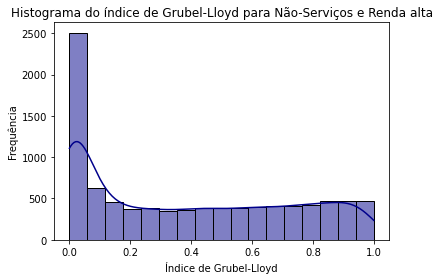

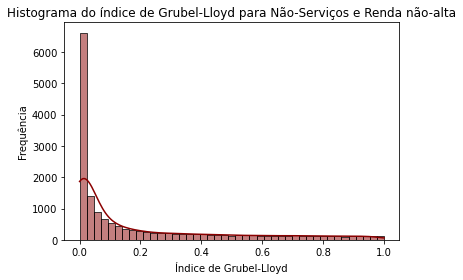

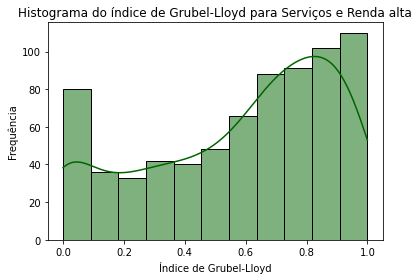

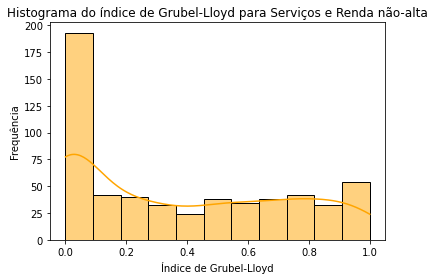

In [107]:
#Definindo cores diferentes

colors = ['darkblue', 'darkred', 'darkgreen', 'orange']

# Criando os histogramas

for i, (name, group) in enumerate(hist_grouped):
    sns.histplot(data=group, x='G&L', bins='auto', color=colors[i], kde=True)
    plt.title(f"Histograma do índice de Grubel-Lloyd para {name[0]} e {name[1]}")
    plt.xlabel('Índice de Grubel-Lloyd')
    plt.ylabel('Frequência')
    plt.savefig(f"histograma_{name[0]}_{name[1]}.png")
    plt.show()

# 2.2 #

***Letra a)*** 

In [108]:
# Lista de países do Mercosul (Venezuela foi suspensa em 2016 e como dados vão até 2016 iremos levá-la em consideração)

merc_coun =['Argentina','Brazil','Paraguay','Uruguay','Venezuela']

export_per_sector = export_per_sector.reset_index()

In [109]:
# Filtrando dados de exportação para os países do Mercosul

exports_merc = export_per_sector[export_per_sector['Country'].isin(merc_coun)]
exports_merc = exports_merc.reset_index()
exports_merc = exports_merc.drop(columns = 'index')
exports_merc.rename(columns = {'Industry': 'Sector', 'Sector': 'Industry'}, inplace=True)
exports_merc

,level_0,Country,Sector,Industry,year,Export
0,104040,Argentina,Agriculture,Wheat,2000,1.358537e-06
1,104041,Argentina,Agriculture,Wheat,2001,1.395184e-06
2,104042,Argentina,Agriculture,Wheat,2002,1.221318e-06
3,104043,Argentina,Agriculture,Wheat,2003,9.994660e-07
4,104044,Argentina,Agriculture,Wheat,2004,1.521770e-06
...,...,...,...,...,...,...
57795,2728155,Venezuela,Services,Other personal services,2012,0.000000e+00
57796,2728156,Venezuela,Services,Other personal services,2013,0.000000e+00
57797,2728157,Venezuela,Services,Other personal services,2014,0.000000e+00
57798,2728158,Venezuela,Services,Other personal services,2015,0.000000e+00


In [110]:
# Analogamente para importações:
import_per_sector = import_per_sector.reset_index()
import_per_sector

,index,Country,Industry,Sector,year,Import
0,0,Afghanistan,Agriculture,Wheat,2000,5.761000e-08
1,1,Afghanistan,Agriculture,Wheat,2001,2.062500e-08
2,2,Afghanistan,Agriculture,Wheat,2002,1.819900e-08
3,3,Afghanistan,Agriculture,Wheat,2003,4.726000e-09
4,4,Afghanistan,Agriculture,Wheat,2004,7.523000e-09
...,...,...,...,...,...,...
2785955,2785955,Zambia,Services,Other personal services,2012,0.000000e+00
2785956,2785956,Zambia,Services,Other personal services,2013,0.000000e+00
2785957,2785957,Zambia,Services,Other personal services,2014,0.000000e+00
2785958,2785958,Zambia,Services,Other personal services,2015,0.000000e+00


In [111]:
# Filtrando dados de exportação para os países do Mercosul

imports_merc = import_per_sector[import_per_sector['Country'].isin(merc_coun)]
imports_merc = imports_merc.reset_index()
imports_merc = imports_merc.drop(columns = 'index')
imports_merc.rename(columns = {'Industry': 'Sector', 'Sector': 'Industry'}, inplace=True)
imports_merc

,level_0,Country,Sector,Industry,year,Import
0,104040,Argentina,Agriculture,Wheat,2000,8.200000e-11
1,104041,Argentina,Agriculture,Wheat,2001,1.023000e-09
2,104042,Argentina,Agriculture,Wheat,2002,8.300000e-11
3,104043,Argentina,Agriculture,Wheat,2003,2.800000e-11
4,104044,Argentina,Agriculture,Wheat,2004,1.410000e-10
...,...,...,...,...,...,...
57795,2728155,Venezuela,Services,Other personal services,2012,0.000000e+00
57796,2728156,Venezuela,Services,Other personal services,2013,0.000000e+00
57797,2728157,Venezuela,Services,Other personal services,2014,0.000000e+00
57798,2728158,Venezuela,Services,Other personal services,2015,0.000000e+00


In [112]:
# Agregando os Dataframes

im_ex_merc = pd.merge(exports_merc, imports_merc, on = ['Country','Industry','year','Sector'])
im_ex_merc

,level_0_x,Country,Sector,Industry,year,Export,level_0_y,Import
0,104040,Argentina,Agriculture,Wheat,2000,1.358537e-06,104040,8.200000e-11
1,104041,Argentina,Agriculture,Wheat,2001,1.395184e-06,104041,1.023000e-09
2,104042,Argentina,Agriculture,Wheat,2002,1.221318e-06,104042,8.300000e-11
3,104043,Argentina,Agriculture,Wheat,2003,9.994660e-07,104043,2.800000e-11
4,104044,Argentina,Agriculture,Wheat,2004,1.521770e-06,104044,1.410000e-10
...,...,...,...,...,...,...,...,...
57795,2728155,Venezuela,Services,Other personal services,2012,0.000000e+00,2728155,0.000000e+00
57796,2728156,Venezuela,Services,Other personal services,2013,0.000000e+00,2728156,0.000000e+00
57797,2728157,Venezuela,Services,Other personal services,2014,0.000000e+00,2728157,0.000000e+00
57798,2728158,Venezuela,Services,Other personal services,2015,0.000000e+00,2728158,0.000000e+00


***Item b)***

In [113]:
#Calculando o índice G&L

im_ex_merc['G&L'] = 1 - abs(im_ex_merc['Export'] - im_ex_merc['Import'])/(im_ex_merc['Export'] + im_ex_merc['Import'])
im_ex_merc

,level_0_x,Country,Sector,Industry,year,Export,level_0_y,Import,G&L
0,104040,Argentina,Agriculture,Wheat,2000,1.358537e-06,104040,8.200000e-11,0.000121
1,104041,Argentina,Agriculture,Wheat,2001,1.395184e-06,104041,1.023000e-09,0.001465
2,104042,Argentina,Agriculture,Wheat,2002,1.221318e-06,104042,8.300000e-11,0.000136
3,104043,Argentina,Agriculture,Wheat,2003,9.994660e-07,104043,2.800000e-11,0.000056
4,104044,Argentina,Agriculture,Wheat,2004,1.521770e-06,104044,1.410000e-10,0.000185
...,...,...,...,...,...,...,...,...,...
57795,2728155,Venezuela,Services,Other personal services,2012,0.000000e+00,2728155,0.000000e+00,NaN
57796,2728156,Venezuela,Services,Other personal services,2013,0.000000e+00,2728156,0.000000e+00,NaN
57797,2728157,Venezuela,Services,Other personal services,2014,0.000000e+00,2728157,0.000000e+00,NaN
57798,2728158,Venezuela,Services,Other personal services,2015,0.000000e+00,2728158,0.000000e+00,NaN


***Item c)***

In [114]:
# Filtrando as indústrias com alto volume de comércio intra-indústria em cada país
gl_mean = im_ex_merc.groupby(['Country', 'Industry'])['G&L'].mean().reset_index()
gl_high = gl_mean[gl_mean['G&L'] > gl_mean.groupby('Country')['G&L'].transform('mean')]

#Indústrias com maior G&L em cada país

gl_pivot = gl_high.pivot_table(index='Country', values='G&L', columns='Industry', aggfunc='max')
print(gl_pivot)

Industry       Corn  Other cereals  Cereal products  \
Country                                               
Argentina       NaN            NaN              NaN   
Brazil          NaN            NaN         0.514249   
Paraguay   0.246999       0.456022              NaN   
Uruguay    0.460590       0.471096              NaN   
Venezuela       NaN            NaN              NaN   

Industry   Other oilseeds (excluding peanuts)  \
Country                                         
Argentina                                 NaN   
Brazil                               0.636923   
Paraguay                             0.266963   
Uruguay                              0.400448   
Venezuela                            0.545281   

Industry   Animal feed ingredients and pet foods  Other sweeteners  \
Country                                                              
Argentina                                    NaN               NaN   
Brazil                                       NaN            

In [115]:
# Agrupando os dados por país e selecionando a indústria com o maior valor de G&L
gl_max = im_ex_merc.groupby(['Country', 'Industry'])['G&L'].max().reset_index()
idx = gl_max.groupby(['Country'])['G&L'].transform(max) == gl_max['G&L']
gl_max_ind = gl_max[idx]

# Ordenando a tabela por país e valor de G&L
gl_max_ind = gl_max_ind.sort_values(['Country', 'G&L'], ascending=[True, False])

# Exibindo a tabela
print(gl_max_ind)

         Country                                           Industry       G&L
1677   Argentina                                          Furniture  0.999801
4243      Brazil                 Heritage and recreational services  1.000000
28569   Paraguay                                   Other sweeteners  1.000000
39767    Uruguay                                       Construction  1.000000
40103  Venezuela  Manufacturing services on physical inputs owne...  1.000000


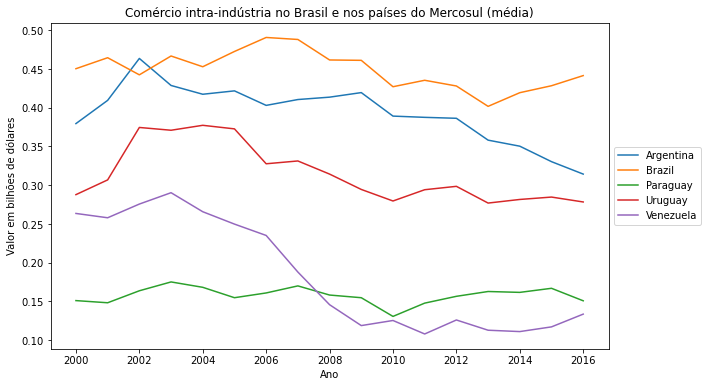

In [121]:
im_ex_merc_bloco = im_ex_merc[im_ex_merc['Country'].isin(merc_coun)]
im_ex_merc_bloco_pivot = im_ex_merc_bloco.pivot_table(index='year', columns='Country', values='G&L', aggfunc='mean')
ax = im_ex_merc_bloco_pivot.plot(figsize=(10,6))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Comércio intra-indústria no Brasil e nos países do Mercosul (média)')
plt.xlabel('Ano')
plt.ylabel('Valor em bilhões de dólares')
plt.savefig('grafico_comercio_intra_industria.png', bbox_inches='tight')
plt.show()